In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import splrep,splint,splev,BSpline,sproot,splprep,bisplrep,bisplev
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit as cfit
from scipy.interpolate import RectBivariateSpline
import scipy
from tqdm import tqdm
%matplotlib inline

In [2]:
I1=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.9,2.7,4.9,6.9,11.8,12.7,15.2,49.1,93.2,143.4,166.7,195.4,168.6
             ,187.5])
V1=np.array([1.203,1.412,1.477,1.492,1.501,1.517,1.527,1.533,1.539,1.546,1.555,1.556,1.580,1.600,1.633,1.647,1.674,1.679,1.686,
             1.742,1.773,1.892,1.897,1.904,1.896,1.904])

I2=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.0,1.2,1.7,3.0,4.3,10.9,16.2,33.3,73.9])
V2=np.array([1.473,1.878,2.20,2.23,2.25,2.27,2.29,2.31,2.33,2.35,2.39,2.41,2.45,2.47,2.50,2.53])

I3=np.array([0.1,0.2,0.3,0.4,0.8,0.6,1.0,2.9,1.5,1.7,9.5,15.1,16.2,17.4,36.2,33.2,78.2,129.3,197.1,103.1])
V3=np.array([1.264,1.840,1.963,2.02,2.03,2.06,2.10,2.20,2.09,2.10,2.34,2.41,2.42,2.43,2.55,2.57,2.66,2.75,2.82,2.73])

I4=np.array([0.1,0.2,0.3,0.8,1.0,1.4,2.9,5.2,3.0,8.6,9.5,13.6,32.6,50.6,81.7,92.9,140.1,176.8,164.5,55.9,100.5])
V4=np.array([1.159,1.250,1.292,1.356,1.368,1.391,1.434,1.469,1.437,1.500,1.509,1.528,1.585,1.611,1.641,1.649,1.676,1.688,1.686
             ,1.618,1.655])

Lambda = np.array([659,590,567,469])
Volt = np.array([1.509,1.674, 1.840,2.27])
Eg1 = []
Eg = []

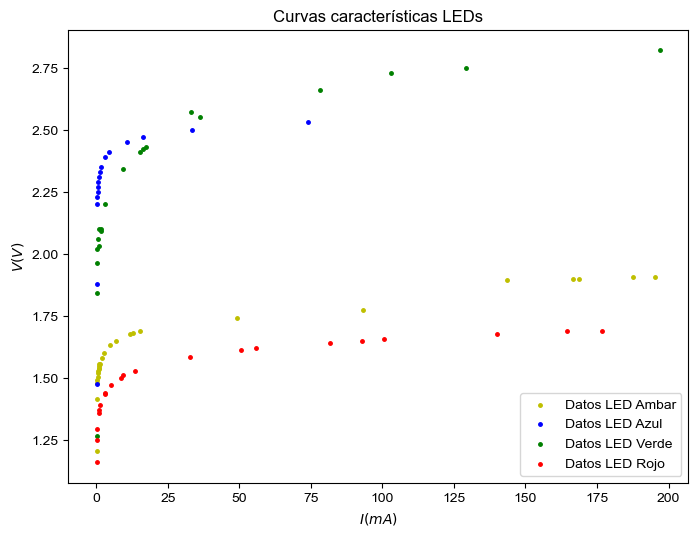

In [3]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(I1,V1,s=25,color='y',marker='.')
plt.scatter(I2,V2,s=25,color='b',marker='.')
plt.scatter(I3,V3,s=25,color='g',marker='.')
plt.scatter(I4,V4,s=25,color='r',marker='.')
plt.legend(['Datos LED Ambar', 'Datos LED Azul' , 'Datos LED Verde' , 'Datos LED Rojo'])
plt.title('Curvas características LEDs')
plt.xlabel('$I (mA)$')
plt.ylabel('$V (V)$')
plt.style.use('seaborn-whitegrid')
plt.show()

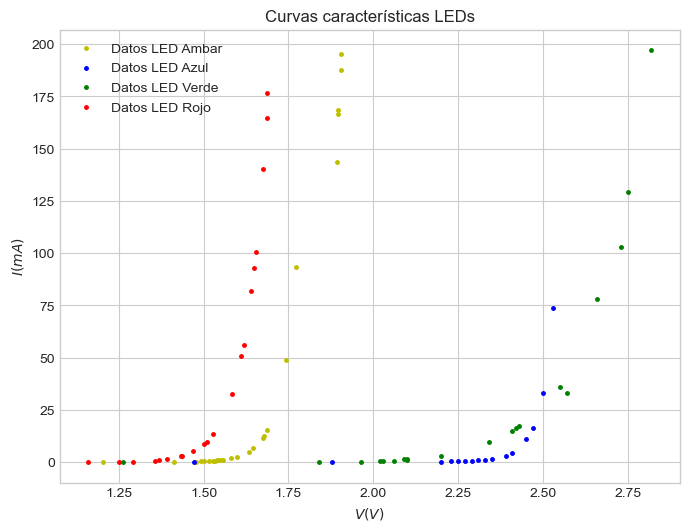

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(V1,I1,s=25,color='y',marker='.')
plt.scatter(V2,I2,s=25,color='b',marker='.')
plt.scatter(V3,I3,s=25,color='g',marker='.')
plt.scatter(V4,I4,s=25,color='r',marker='.')
plt.legend(['Datos LED Ambar', 'Datos LED Azul' , 'Datos LED Verde' , 'Datos LED Rojo'])
plt.title('Curvas características LEDs')
plt.xlabel('$V (V)$')
plt.ylabel('$I (mA)$')
plt.style.use('seaborn-whitegrid')
plt.show()

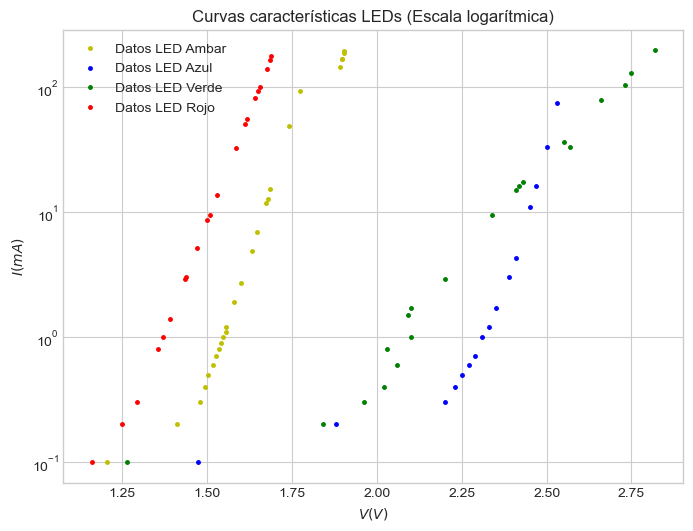

In [5]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(V1,I1,s=25,color='y',marker='.')
plt.scatter(V2,I2,s=25,color='b',marker='.')
plt.scatter(V3,I3,s=25,color='g',marker='.')
plt.scatter(V4,I4,s=25,color='r',marker='.')
plt.legend(['Datos LED Ambar', 'Datos LED Azul' , 'Datos LED Verde' , 'Datos LED Rojo'])
plt.title('Curvas características LEDs (Escala logarítmica)')
plt.xlabel('$V (V)$')
plt.ylabel('$I (mA)$')
plt.yscale('log')
plt.style.use('seaborn-whitegrid')
plt.show()

In [6]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
def func(x, a, b,c): # Sigmoid A With Offset from zunzun.com
    return   a*numpy.exp((b*x)+c)
# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minY, maxY]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minY, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x


Parameters [ 3.74730313e-06  1.61049510e+01 -9.53929462e+00]
RMSE: 1.237178996604539
R-squared: 0.9995292297056755


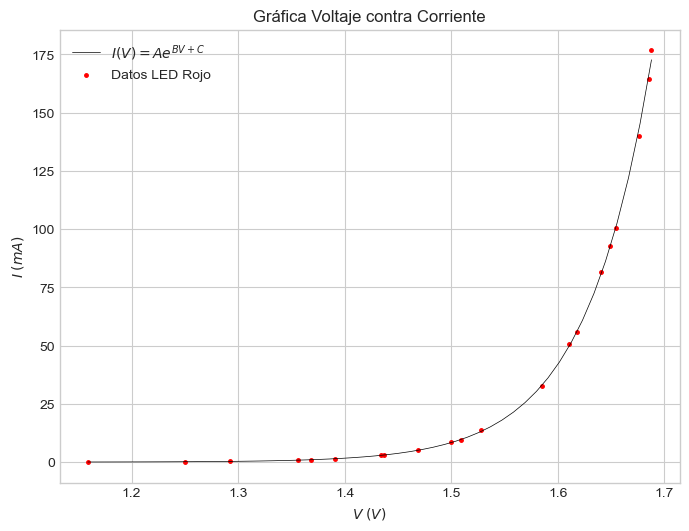

0.5923206233490578


In [7]:

xData = V4
yData=I4

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B,C = fittedParameters[0], fittedParameters[1], fittedParameters[2]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='r',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$V \; (V)$') # X axis data label
    axes.set_ylabel(r'$I \; (mA)$') # Y axis data label
    axes.legend([r'$I(V) = Ae^{BV+C}$','Datos LED Rojo'])
    axes.set_title('Gráfica Voltaje contra Corriente')
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
Eg1.append(-fittedParameters[2]/fittedParameters[1])
print(-fittedParameters[2]/fittedParameters[1])


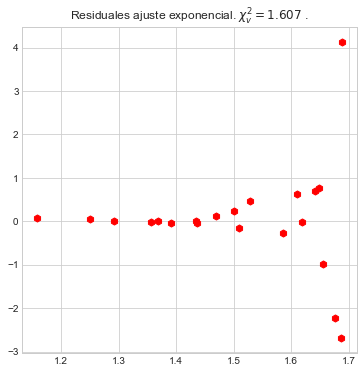

In [8]:
f=plt.figure(figsize=(6,6))
chis=sum((I4-func(V4,A,B,C))**2)/(len(V4)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(V4,I4-func(V4,A,B,C),s=50,marker="h",color= 'r')

Parameters [ 6.36566738e-04  9.61451220e+00 -5.73426536e+00]
RMSE: 10.746108871803902
R-squared: 0.975602720570266


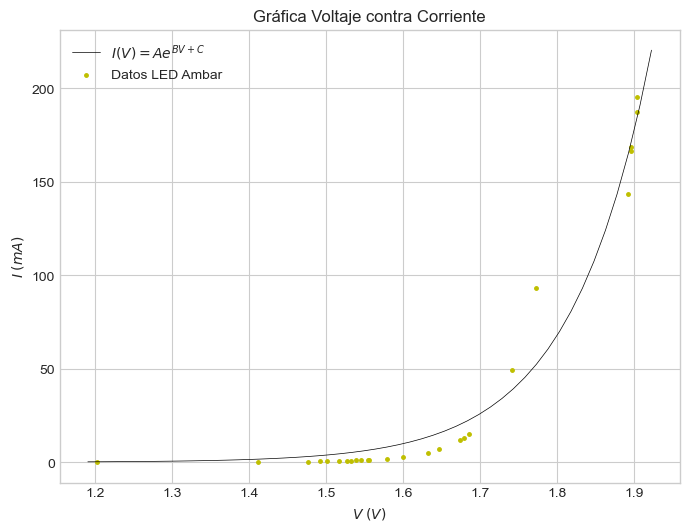

0.5964177112835509


In [9]:
xData = V1
yData=I1

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

A,B,C = fittedParameters[0], fittedParameters[1], fittedParameters[2]


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='y',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData)*0.99, max(xData)*1.01)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')
    axes.set_xlabel(r'$V \;(V)$') # X axis data label
    axes.set_ylabel(r'$I\; (mA)$') # Y axis data label
    axes.legend([r'$I(V) = Ae^{BV+C}$','Datos LED Ambar'])
    axes.set_title('Gráfica Voltaje contra Corriente')
    plt.show()
    plt.close('all') # clean up after using pyplot



plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
Eg1.append(-fittedParameters[2]/fittedParameters[1])
print(-fittedParameters[2]/fittedParameters[1])

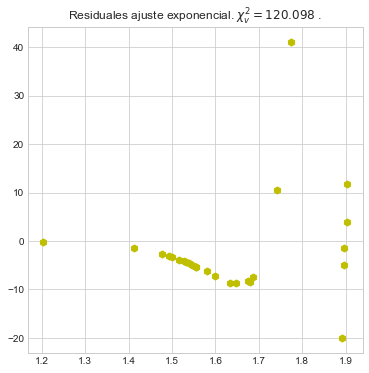

In [10]:
f=plt.figure(figsize=(6,6))
chis=sum((I1-func(V1,A,B,C))**2)/(len(V1)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(V1,I1-func(V1,A,B,C),s=50,marker="h",color = 'y')

Parameters [ 1.78264974e-04  6.40023804e+00 -4.13384208e+00]
RMSE: 2.976281498452558
R-squared: 0.9967799110083403


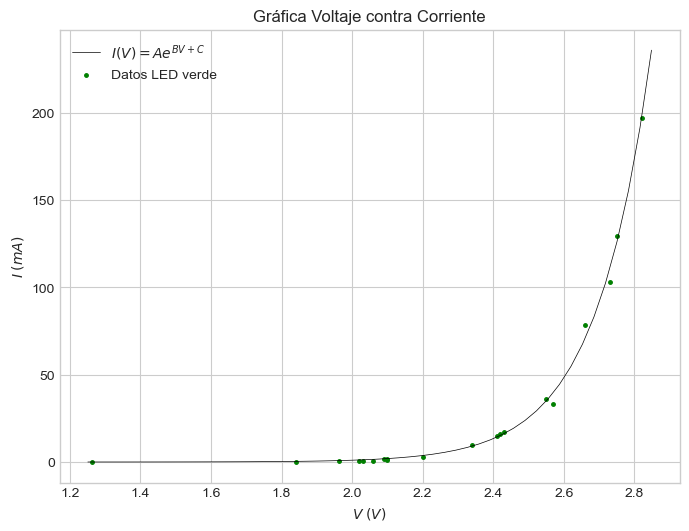

0.645888802133311


In [11]:
xData = V3
yData=I3

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

A,B,C = fittedParameters[0], fittedParameters[1], fittedParameters[2]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='g',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData)*0.99, max(xData)*1.01)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$V \; (V)$') # X axis data label
    axes.set_ylabel(r'$I \; (mA)$') # Y axis data label
    axes.legend([r'$I(V) = Ae^{BV+C}$','Datos LED verde'])
    axes.set_title('Gráfica Voltaje contra Corriente')
    plt.show()
    plt.close('all') # clean up after using pyplot



plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
Eg1.append(-fittedParameters[2]/fittedParameters[1])
print(-fittedParameters[2]/fittedParameters[1])

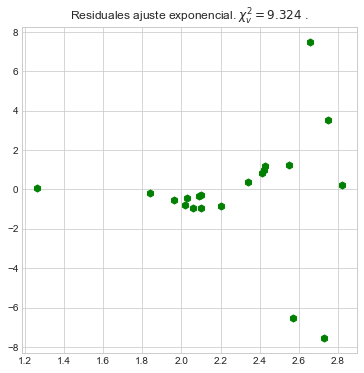

In [12]:
f=plt.figure(figsize=(6,6))
chis=sum((I3-func(V3,A,B,C))**2)/(len(V3)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(V3,I3-func(V3,A,B,C),s=50,marker="h",color='g')

Parameters [ 1.30516401e-15  2.50099830e+01 -2.47065950e+01]
RMSE: 0.6543705814867179
R-squared: 0.999182055620916


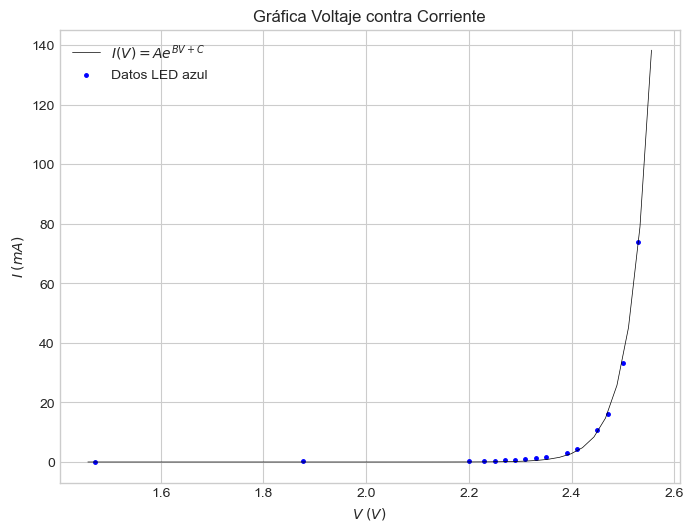

0.9878693212543691


In [13]:
xData = V2
yData=I2


# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

A,B,C = fittedParameters[0], fittedParameters[1], fittedParameters[2]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='b',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData)*0.99, max(xData)*1.01)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$V \; (V)$') # X axis data label
    axes.set_ylabel(r'$I \; (mA)$') # Y axis data label
    axes.legend([r'$I(V) = Ae^{BV+C}$','Datos LED azul'])
    axes.set_title('Gráfica Voltaje contra Corriente')
    plt.show()
    plt.close('all') # clean up after using pyplot



plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
Eg1.append(-fittedParameters[2]/fittedParameters[1])
print(-fittedParameters[2]/fittedParameters[1])

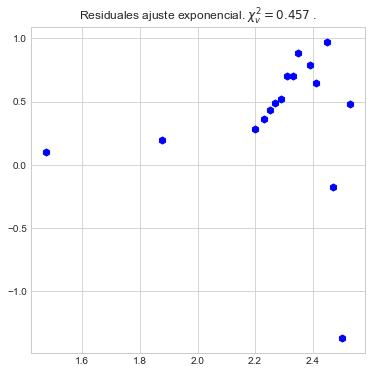

In [14]:
f=plt.figure(figsize=(6,6))
chis=sum((I2-func(V2,A,B,C))**2)/(len(V2)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(V2,I2-func(V2,A,B,C),s=50,marker="h",color='b')

In [20]:
Frec = []
for i in Lambda:
    l =  i/(1000000000)
    f = (scipy.constants.c)/(l)
    Frec.append(f)
print(scipy.constants.c)

299792458.0


[0.5923206233490578, 0.5964177112835509, 0.645888802133311, 0.9878693212543691]
[454920270106221.56, 508122810169491.56, 528734493827160.44, 639216328358209.0]


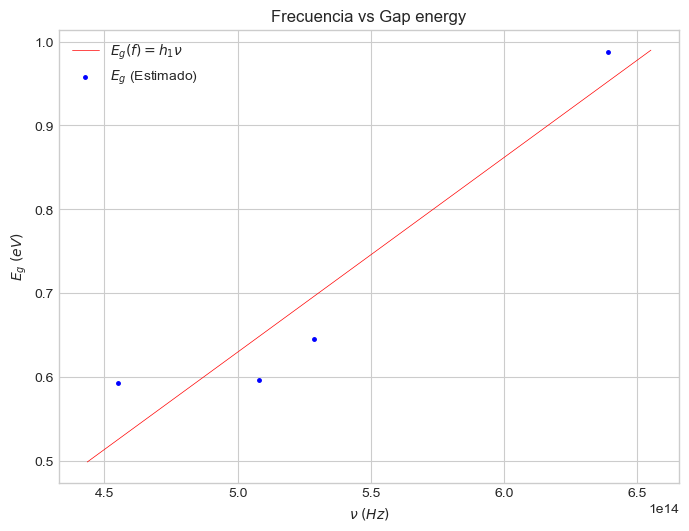

2.3201173257634284e-15 -0.5304148540496015
RMSE: 0.05248745314976007
R-squared: 0.8979601479662591


In [32]:
h=lambda x,A,B: A*x+B
popth,pcovh=cfit(h,Frec,Eg1)
A1,B1=popth
print(Eg1)
print(Frec)
Xtest = np.linspace(min(Frec)*0.975,max(Frec)*1.025,200)
Yfit = h(Xtest,A1,B1)
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(Frec,Eg1,s=25,color='b',marker='.')
plt.plot(Xtest,Yfit,linewidth = 0.5, color = 'r')

plt.legend([r'$E_{g}(f) =h_{1}\nu$',r'$E_{g}$ (Estimado)'])
plt.title('Frecuencia vs Gap energy')
plt.xlabel(r'$\nu \; (Hz)$')
plt.ylabel(r'$E_{g}\; (eV)$')
plt.style.use('seaborn-whitegrid')
plt.show()
print(A1,B1)
YFit = h(np.array(Frec),A1,B1)
absError =  YFit - Eg1

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(Eg1))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)


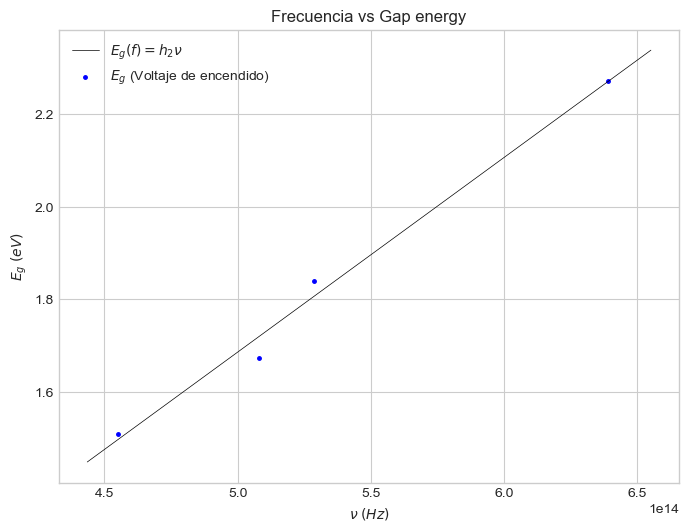

RMSE: 0.029106737379240143
R-squared: 0.9686205104247516
[1.509 1.674 1.84  2.27 ]
4.1981385022047356e-15 -0.4133018874974482


In [34]:
Eg2 = Volt
popth,pcovh=cfit(h,Frec,Eg2)
A2,B2=popth

Xtest = np.linspace(min(Frec)*0.975,max(Frec)*1.025,200)
Yfit = h(Xtest,A2,B2)
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(Frec,Eg2,s=25,color='b',marker='.')
plt.plot(Xtest,Yfit,linewidth = 0.5, color = 'k')
plt.legend([r'$E_{g}(f) =h_{2}\nu$',r'$E_{g}$ (Voltaje de encendido)'])
plt.title('Frecuencia vs Gap energy')
plt.xlabel(r'$\nu \; (Hz)$')
plt.ylabel(r'$E_{g}\; (eV)$')
plt.style.use('seaborn-whitegrid')
plt.show()
YFit = h(np.array(Frec),A2,B2)
absError =  YFit - Eg2

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(Eg1))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print(Eg2)
print(A2,B2)

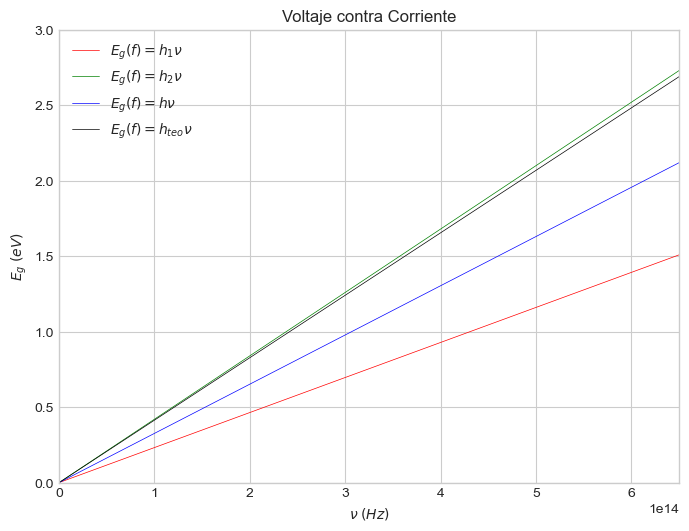

2.3201173257634284e-15 4.1981385022047356e-15 4.135667696e-15


In [37]:
Xtest = np.linspace(0,max(Frec)*1.025,200)
Yfit = h(Xtest,A1,0)
Yfit2 = h(Xtest,A2,0)
Yfit3 = h(Xtest,(A2+A1)/2,0)
plt.figure(figsize=(8,6),dpi=100)
plt.plot(Xtest,Yfit,linewidth = 0.5, color = 'r')
plt.plot(Xtest,Yfit2,linewidth = 0.5, color = 'g')

plt.plot(Xtest,Yfit3,linewidth = 0.5, color = 'b')
plt.plot(Xtest,h(Xtest,scipy.constants.physical_constants['Planck constant in eV/Hz'][0],0),linewidth = 0.5, color = 'k')
plt.legend([r'$E_{g}(f) =h_{1}\nu$',r'$E_{g}(f) =h_{2}\nu$',r'$E_{g}(f) =h \nu$', r'$E_{g}(f) =h_{teo}\nu$'])
plt.title('Voltaje contra Corriente')
plt.xlabel(r'$\nu \; (Hz)$')
plt.ylabel(r'$E_{g}\; (eV)$')
plt.style.use('seaborn-whitegrid')
plt.ylim(0,3)
plt.xlim(0,6.5*(10**14))
plt.show()
print(A1,A2,scipy.constants.physical_constants['Planck constant in eV/Hz'][0])